In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import itertools

In [3]:
df = pd.read_csv('advertising.csv')
print(df.head())
print(df.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
(200, 4)


Text(0, 0.5, 'Sales')

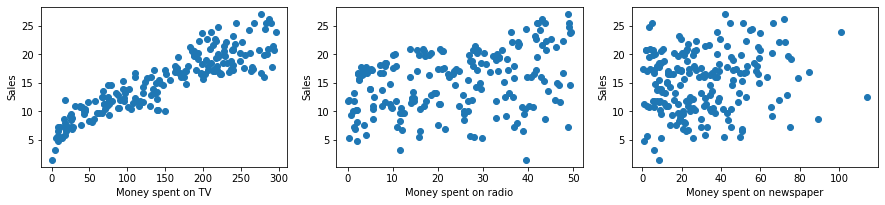

In [5]:
#Advertising media vs sales for each
#Optional

gs = plt.figure(figsize=(15,10))

gs.add_subplot(3,3,1)
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("Money spent on TV")
plt.ylabel("Sales")

gs.add_subplot(3,3,2)
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel("Money spent on radio")
plt.ylabel("Sales")

gs.add_subplot(3,3,3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel("Money spent on newspaper")
plt.ylabel("Sales")

In [12]:
def linReg(x,y):
    X_train, X_test, y_train, y_test = train_test_split(df[x], df[y], test_size=0.3)
    X_train = X_train.to_numpy().reshape(-1,1)
    X_test = X_test.to_numpy().reshape(-1,1)
    y_train = y_train.to_numpy().reshape(-1,1)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    print("Coefficient=",lr.coef_[0][0],"\nIntercept=",lr.intercept_[0])
    pred = lr.predict(X_test)
    
    print("The linear model of {} versus {} is: Y = {:.3} + {:.2}X".format(x,y,lr.intercept_[0], lr.coef_[0][0]))
    
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    
    print("RMSE = {}\nMAE = {}\nMSE = {}\n".format(rmse, mae, mse))
    
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.xlabel("Money spent on "+x)
    plt.ylabel(y)
    plt.title(x + " vs " + y)
    plt.plot(X_test, pred, c="gold")

Coefficient= 0.05512006965406946 
Intercept= 6.908899112923194
The linear model of TV versus Sales is: Y = 6.91 + 0.055X
RMSE = 2.2160152153204837
MAE = 1.727468769533248
MSE = 4.9107234345318895

Coefficient= 0.12067480332422989 
Intercept= 12.264767134852528
The linear model of Radio versus Sales is: Y = 12.3 + 0.12X
RMSE = 4.505157795296723
MAE = 3.850725890987931
MSE = 20.29644676052283

Coefficient= 0.0459443115295071 
Intercept= 13.584860594412447
The linear model of Newspaper versus Sales is: Y = 13.6 + 0.046X
RMSE = 4.366862511429133
MAE = 3.659961593891406
MSE = 19.069488193725157



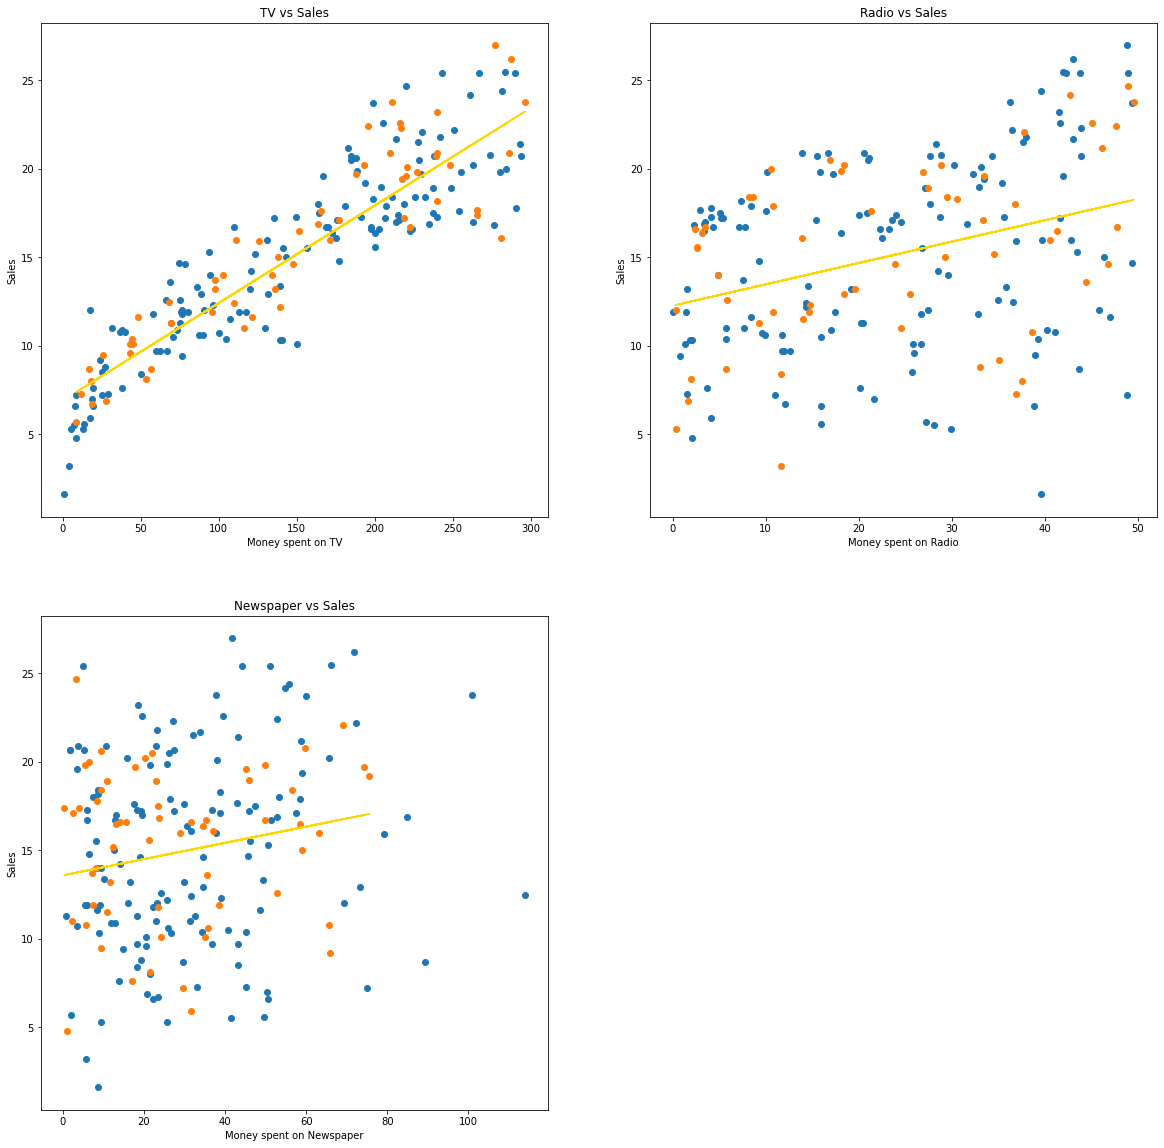

In [13]:
sheet = plt.figure(figsize=(20,20))

sheet.add_subplot(2,2,1)
linReg('TV','Sales')

sheet.add_subplot(2,2,2)
linReg('Radio','Sales')

sheet.add_subplot(2,2,3)
linReg('Newspaper','Sales')